In [15]:
%matplotlib inline
from SALib.sample import saltelli

# mesa tools import
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [16]:
replicates = 10
max_steps = 10000
distinct_samples = 20
df = pd.read_csv(f"data/OFAT_DistinctSamples{distinct_samples}_MaxSteps{max_steps}_Repi{replicates}.csv")
data = {}
data['population'] = df.loc[:200]
data['relaxation_time'] = df.loc[200:400]
data['door_size'] = df.loc[400:600]

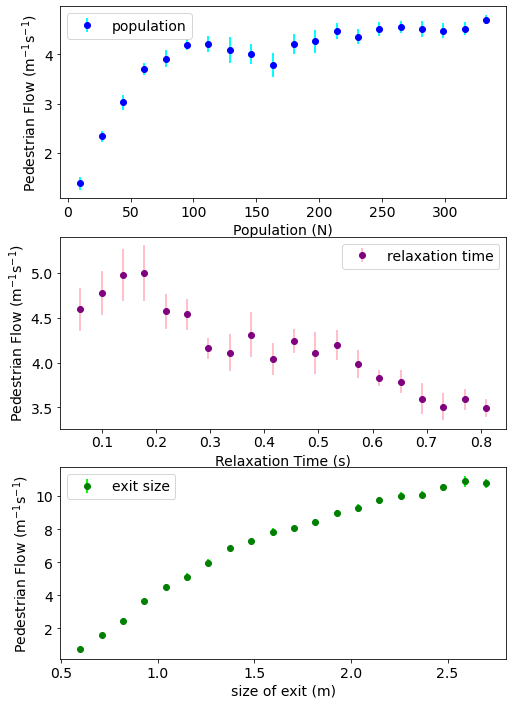

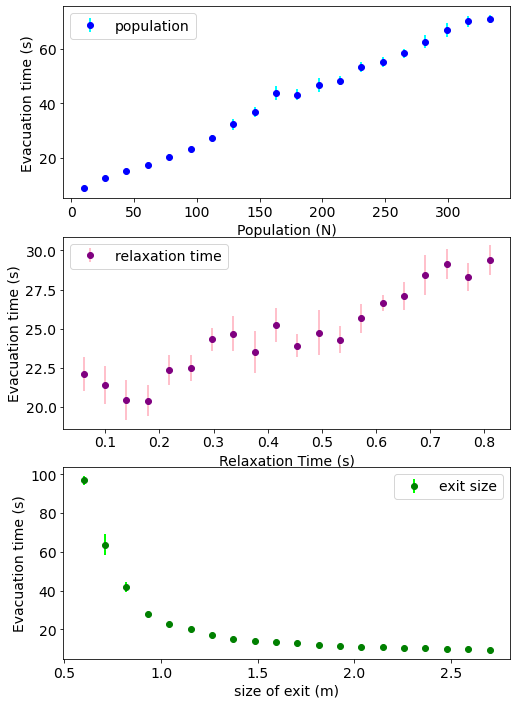

In [35]:
# put all the sa analysis to jupyter file later for ploting 
def plot_param_var_conf(ax, df, var, param, i):
    """
    Helper function for plot_all_vars. Plots the individual parameter vs
    variables passed.

    Args:
        ax: the axis to plot to
        df: dataframe that holds the data to be plotted
        var: variables to be taken from the dataframe
        param: which output variable to plot
    """
    x = df.groupby(var).mean().reset_index()[var]
    y = df.groupby(var).mean()[param]

    replicates = df.groupby(var)[param].count()
    err = (1.96 * df.groupby(var)[param].std()) / np.sqrt(replicates)
    
    if var == 'population':
        ax.errorbar(x, y, yerr=err, fmt='o', color='blue',
                ecolor='cyan', elinewidth=2, capsize=0, label = 'population')
        ax.set_xlabel('Population (N)', fontsize=14)
    elif var == 'relaxation_time':
        ax.errorbar(x, y, yerr=err, fmt='o', color='purple',
                ecolor='pink', elinewidth=2, capsize=0,  label = 'relaxation time')
        ax.set_xlabel('Relaxation Time (s)', fontsize=14)
    else:
        ax.errorbar(x, y, yerr=err, fmt='o', color='green',
                ecolor='lime', elinewidth=2, capsize=0,  label = 'exit size')
        ax.set_xlabel('size of exit (m)', fontsize=14)
    

    if param == 'Evacuation time':
        ax.set_ylabel(f'{param} (s)', fontsize=14)
    elif param == 'Flow':
        ax.set_ylabel('Pedestrian Flow (m$^{-1}$s$^{-1}$)', fontsize=14)
    else:
        ax.set_ylabel(param, fontsize=14)

    ax.legend(fontsize=14)
    ax.tick_params(axis='x', labelsize= 14)
    ax.tick_params(axis='y', labelsize= 14)


def plot_all_vars(data, params):
    """
    Plots the parameters passed vs each of the output variables.

    Args:
        df: dataframe that holds all data
        param: the parameter to be plotted
    """
    parameters = {
    'names': ['population', 'relaxation_time', 'door_size'],
    'bounds': [[10, 333], [0.06, 0.81], [0.6, 2.7]]
    }
    _, axs = plt.subplots(3, figsize=(8, 12))

    for i, var in enumerate(parameters['names']):
        plot_param_var_conf(axs[i], data[var], var, params, i)

for params in ("Flow", "Evacuation time"):
    plot_all_vars(data, params)